# HW9: Assignment 2
ah4412

**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [3]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load(open(os.getenv('PUI2018') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [29]:
# Create x
x = np.arange(10, 110, 10)

In [30]:
# Set seed and create y
np.random.seed(123)
y = line(a=2, x=x)

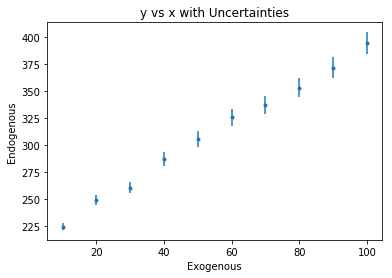

In [82]:
# Plot y vs x with error bars
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.xlabel('Exogenous')
pl.ylabel('Endogenous')
pl.title('y vs x with Uncertainties')
pl.show()

**Figure:** This plot shows our y variable plotted against our x variable with uncertainties as error bars in blue. The relationship appears positive and linear, though imperfectly.

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [41]:
# Apply function
xmat = sm.add_constant(x)

# Print y, x, and results
print(y, x, xmat, sep='\n')

[  22.36606553   47.19428472   58.51987623   85.13769768  103.53369645
  123.67427837  135.28187388  151.0796856   169.56407472  192.43562791]
[ 10  20  30  40  50  60  70  80  90 100]
[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y and print the model summary for each and discuss the differences 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

**ANSWER:** The major difference between the two summaries is that the first regression did not estimate an intercept term (const), while the second did. The estimated slope of the regression line changed slightly from the first model to the second.

In [45]:
#THE WRONG WAY
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4788.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.39e-13
Time:                        19:48:11   Log-Likelihood:                -30.752
No. Observations:                  10   AIC:                             63.50
Df Residuals:                       9   BIC:                             63.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.9477      0.028     69.192      0.000         1.884     2.011
==============================================================================
Omnibus:                        2.753   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                0.949
Skew:                          -0.113   Prob(JB):                        0.622
Kurtosis:                       1.508   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#THE RIGHT WAY
smfit_r = smf.OLS(y, xmat).fit()
smfit_r.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1692.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.34e-10
Time:                        19:48:20   Log-Likelihood:                -27.042
No. Observations:                  10   AIC:                             58.08
Df Residuals:                       8   BIC:                             58.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.1925      2.762      2.967      0.018         1.824    14.561
x1             1.8307      0.045     41.132      0.000         1.728     1.933
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.017
Skew:                           0.103   Prob(JB):                        0.601
Kurtosis:                       1.451   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

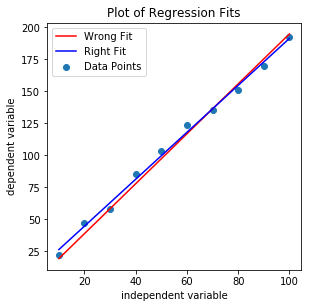

In [57]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = 'Data Points')
ax.plot(x, smfit_w.predict(x), 'k', color='r',
       label = "Wrong Fit")
ax.plot(x, smfit_r.predict(xmat), 'k', color='b',
        label = "Right Fit")
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.set_title('Plot of Regression Fits')
ax.legend()
pl.show()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [62]:
# Set seed and create y
np.random.seed(123)
y = line(a=2, b=101*2, x=x)

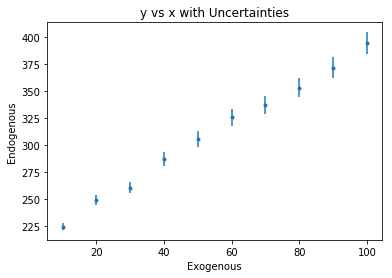

In [83]:
# Plot y vs x with error bars
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.xlabel('Exogenous')
pl.ylabel('Endogenous')
pl.title('y vs x with Uncertainties')
pl.show()

# 6. repeat step 3

**ANSWER:** The major difference between the two summaries is that the first regression did not estimate an intercept term (const), while the second did. This time the estimated slope of the regression line changed dramatically from the first model to the second, decreasing from about 4.8 to about 1.8.

In [64]:
#THE WRONG WAY
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     85.39
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           6.88e-06
Time:                        20:01:19   Log-Likelihood:                -59.974
No. Observations:                  10   AIC:                             121.9
Df Residuals:                       9   BIC:                             122.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.8334      0.523      9.240      0.000         3.650     6.017
==============================================================================
Omnibus:                        1.190   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                0.674
Skew:                          -0.047   Prob(JB):                        0.714
Kurtosis:                       1.732   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#THE RIGHT WAY
smfit_r = smf.OLS(y, xmat).fit()
smfit_r.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1692.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.34e-10
Time:                        20:01:22   Log-Likelihood:                -27.042
No. Observations:                  10   AIC:                             58.08
Df Residuals:                       8   BIC:                             58.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        210.1925      2.762     76.113      0.000       203.824   216.561
x1             1.8307      0.045     41.132      0.000         1.728     1.933
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.017
Skew:                           0.103   Prob(JB):                        0.601
Kurtosis:                       1.451   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [70]:
# Create array of weights
W = 1/errors(x)

array([ 0.31622777,  0.2236068 ,  0.18257419,  0.15811388,  0.14142136,
        0.12909944,  0.11952286,  0.1118034 ,  0.10540926,  0.1       ])

In [79]:
WLSfit = sm.WLS(y, xmat, weights=W)
WLSfit_fit = WLSfit.fit()
WLSfit_fit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1743.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.19e-10
Time:                        20:23:00   Log-Likelihood:                -27.428
No. Observations:                  10   AIC:                             58.86
Df Residuals:                       8   BIC:                             59.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        208.8968      2.365     88.317      0.000       203.442   214.351
x1             1.8523      0.044     41.744      0.000         1.750     1.955
==============================================================================
Omnibus:                        5.125   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                1.213
Skew:                           0.106   Prob(JB):                        0.545
Kurtosis:                       1.307   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

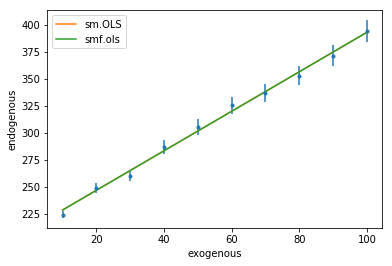

In [81]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit_r.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();